In [1]:
import sys
sys.path.append('../src')

from models.SwinV2Model.train_cv import train_cv as train_SwinV2Model
from models.SwinV2Model.predict import predict as predict_SwinV2Model

from utils.show_graph import plot_history

d:\repo\tkser\technopro-food-package\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
package_model_path, loss_history, auc_history = train_SwinV2Model(
    num_epochs=6,
    learning_rate=1e-05,
    batch_size=2,
    n_splits=5,
    seed=10007
)

[DEBUG] 2023-09-29 04:30:42 - Fold: 1/5
[DEBUG] 2023-09-29 04:30:42 - ----------------------------------------
d:\repo\tkser\technopro-food-package\.venv\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[DEBUG] 2023-09-29 04:30:45 - Using device: cuda(NVIDIA GeForce RTX 3080)
[DEBUG] 2023-09-29 04:30:45 - Starting training on cuda at 2023-09-29 04:30:45
[DEBUG] 2023-09-29 04:30:45 - Model: SwinTransformerV2
[DEBUG] 2023-09-29 04:30:45 - Model parameters:
[DEBUG] 2023-09-29 04:30:45 - patch_embed.proj.weight: torch.Size([192, 3, 4, 4])
[DEBUG] 2023-09-29 04:30:45 - patch_embed.proj.bias: torch.Size([192])
[DEBUG] 2023-09-29 04:30:45 - patch_embed.norm.weight: torch.Size([192])
[DEBUG] 2023-09-29 04:30:45 - patch_embed.norm.bias: torch.Size([192])
[DE

In [3]:
package_model_path

['d:/repo/tkser/technopro-food-package/src/data/models/SwinV2Model_cv/swintransformerv2_20230929043045_epoch_6_auc_0.8983.pth',
 'd:/repo/tkser/technopro-food-package/src/data/models/SwinV2Model_cv/swintransformerv2_20230929044551_epoch_6_auc_0.8993.pth',
 'd:/repo/tkser/technopro-food-package/src/data/models/SwinV2Model_cv/swintransformerv2_20230929050106_epoch_6_auc_0.8765.pth',
 'd:/repo/tkser/technopro-food-package/src/data/models/SwinV2Model_cv/swintransformerv2_20230929051616_epoch_6_auc_0.8856.pth',
 'd:/repo/tkser/technopro-food-package/src/data/models/SwinV2Model_cv/swintransformerv2_20230929053133_epoch_6_auc_0.9167.pth']

In [4]:
best_auc_model_paths = package_model_path

import pandas as pd
sample_submission = pd.read_csv("../src/data/input/sample_submit.csv", header=None, names=['image_name', 'label'])
sample_submission.drop('label', axis=1, inplace=True)

for fold, best_auc_model_path in enumerate(best_auc_model_paths):
  _, y_pred = predict_SwinV2Model(
      model_path=best_auc_model_path,
      batch_size=2,
      use_tta=False,
      seed=0
  )
  sample_submission[f'fold_{fold}'] = y_pred

sample_submission['label'] = sample_submission.iloc[:, 1:].mean(axis=1)
sample_submission.drop(sample_submission.columns[1:-1], axis=1, inplace=True)

sample_submission.to_csv('../src/data/output/submit_swintransformerv2_202309290811_5fold.csv', index=False, header=False)

[DEBUG] 2023-09-29 08:12:13 - Starting prediction on cuda
[DEBUG] 2023-09-29 08:12:13 - Using TTA: False
[DEBUG] 2023-09-29 08:12:13 - TTA Transforms: <ttach.base.Compose object at 0x000002709D5D6C50>
Prediction: 100%|██████████| 1090/1090 [02:10<00:00,  8.38it/s]
[DEBUG] 2023-09-29 08:14:23 - Finished prediction
[DEBUG] 2023-09-29 08:14:26 - Starting prediction on cuda
[DEBUG] 2023-09-29 08:14:26 - Using TTA: False
[DEBUG] 2023-09-29 08:14:26 - TTA Transforms: <ttach.base.Compose object at 0x000002709D63BE10>
Prediction: 100%|██████████| 1090/1090 [02:01<00:00,  8.96it/s]
[DEBUG] 2023-09-29 08:16:28 - Finished prediction
[DEBUG] 2023-09-29 08:16:30 - Starting prediction on cuda
[DEBUG] 2023-09-29 08:16:30 - Using TTA: False
[DEBUG] 2023-09-29 08:16:30 - TTA Transforms: <ttach.base.Compose object at 0x0000027032A39D10>
Prediction: 100%|██████████| 1090/1090 [02:02<00:00,  8.92it/s]
[DEBUG] 2023-09-29 08:18:32 - Finished prediction
[DEBUG] 2023-09-29 08:18:35 - Starting prediction on cu

In [7]:
best_auc_model_paths = [
  'd:/repo/tkser/technopro-food-package/src/data/models/SwinV2Model_cv/swintransformerv2_20230929043045_epoch_3_auc_0.8828.pth',
  'd:/repo/tkser/technopro-food-package/src/data/models/SwinV2Model_cv/swintransformerv2_20230929044551_epoch_3_auc_0.8844.pth',
  'd:/repo/tkser/technopro-food-package/src/data/models/SwinV2Model_cv/swintransformerv2_20230929050106_epoch_3_auc_0.8516.pth',
  'd:/repo/tkser/technopro-food-package/src/data/models/SwinV2Model_cv/swintransformerv2_20230929051616_epoch_3_auc_0.8638.pth',
  'd:/repo/tkser/technopro-food-package/src/data/models/SwinV2Model_cv/swintransformerv2_20230929053133_epoch_3_auc_0.8927.pth'
]

import pandas as pd
sample_submission = pd.read_csv("../src/data/input/sample_submit.csv", header=None, names=['image_name', 'label'])
sample_submission.drop('label', axis=1, inplace=True)

for fold, best_auc_model_path in enumerate(best_auc_model_paths):
  _, y_pred = predict_SwinV2Model(
      model_path=best_auc_model_path,
      batch_size=2,
      use_tta=False,
      seed=0
  )
  sample_submission[f'fold_{fold}'] = y_pred

sample_submission['label'] = sample_submission.iloc[:, 1:].mean(axis=1)
sample_submission.drop(sample_submission.columns[1:-1], axis=1, inplace=True)

sample_submission.to_csv('../src/data/output/submit_swintransformerv2_202309290818_5fold.csv', index=False, header=False)

[DEBUG] 2023-09-29 08:22:48 - Starting prediction on cuda
[DEBUG] 2023-09-29 08:22:48 - Using TTA: False
[DEBUG] 2023-09-29 08:22:48 - TTA Transforms: <ttach.base.Compose object at 0x000002702F7A6B90>
Prediction: 100%|██████████| 1090/1090 [02:01<00:00,  8.95it/s]
[DEBUG] 2023-09-29 08:24:50 - Finished prediction
[DEBUG] 2023-09-29 08:24:53 - Starting prediction on cuda
[DEBUG] 2023-09-29 08:24:53 - Using TTA: False
[DEBUG] 2023-09-29 08:24:53 - TTA Transforms: <ttach.base.Compose object at 0x000002702F618D90>
Prediction: 100%|██████████| 1090/1090 [02:01<00:00,  8.95it/s]
[DEBUG] 2023-09-29 08:26:54 - Finished prediction
[DEBUG] 2023-09-29 08:26:57 - Starting prediction on cuda
[DEBUG] 2023-09-29 08:26:57 - Using TTA: False
[DEBUG] 2023-09-29 08:26:57 - TTA Transforms: <ttach.base.Compose object at 0x000002702F59BC90>
Prediction: 100%|██████████| 1090/1090 [02:01<00:00,  8.96it/s]
[DEBUG] 2023-09-29 08:28:59 - Finished prediction
[DEBUG] 2023-09-29 08:29:01 - Starting prediction on cu

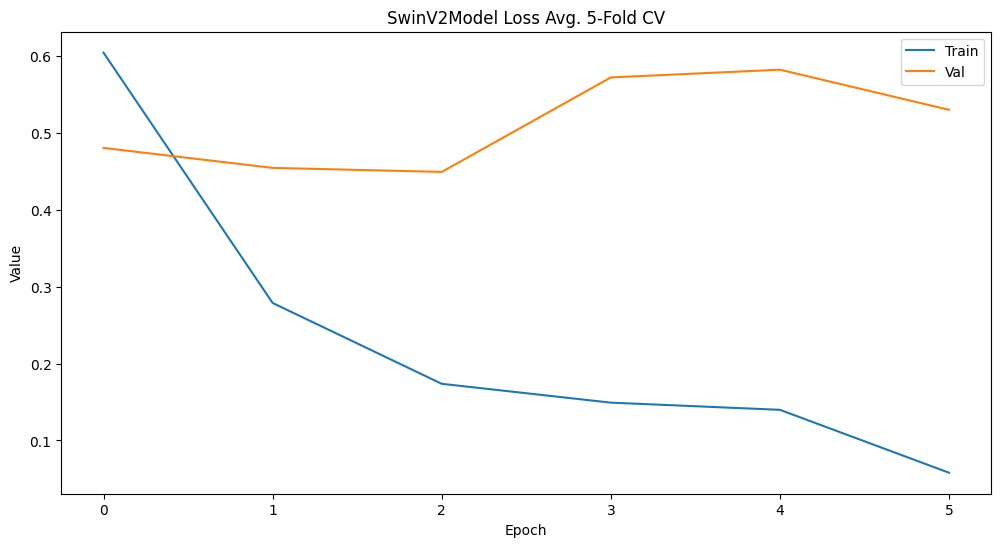

In [8]:
plot_history(loss_history, "SwinV2Model Loss Avg. 5-Fold CV")

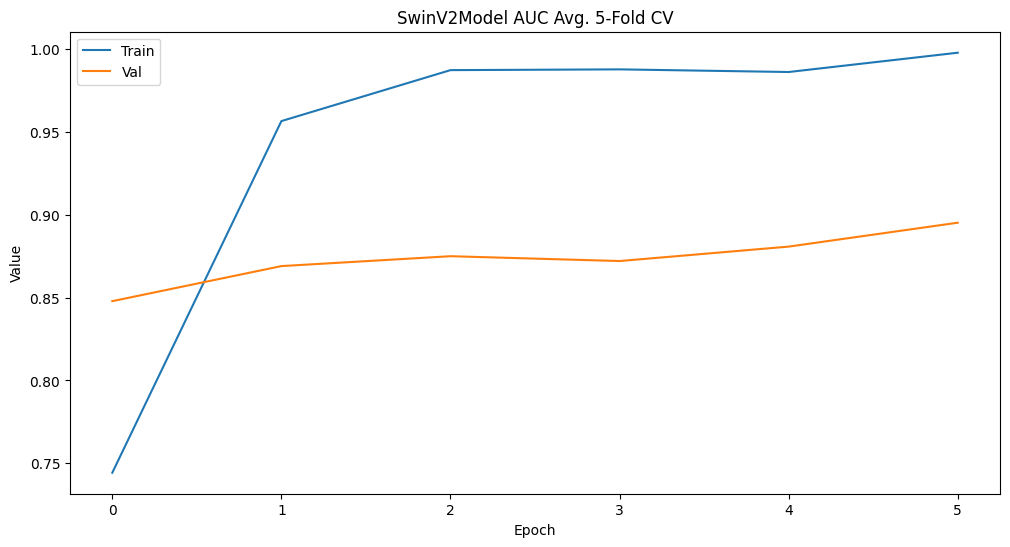

In [9]:
plot_history(auc_history, "SwinV2Model AUC Avg. 5-Fold CV")